# logistic regerssion

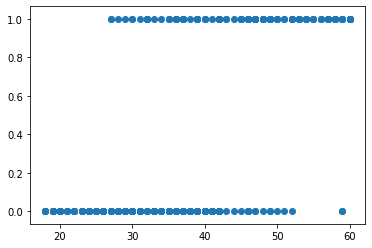

In [4]:
import numpy as np
#import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from math import exp
import pandas as pd 
df=pd.read_csv('docs\Social_Network_Ads.csv') #data_source=https://www.kaggle.com/rakeshrau/social-network-ads
df.head() 
plt.scatter(df['Age'], df['Purchased'])#visulization of data
plt.show()
#normalizing the data 


    

### normalizing the data

In [5]:
def normalize(x):
    return x-x.mean() 
def predict(x,b0,b1):#sigmoid function
    return np.array([1/(1+exp(-1*b0 + -1*X*b1)) for X in x])  

def logistic(x,y):
    x=normalize(x)
    l=0.001#learning rate
    c=0
    m=0#y=mx+c we need to find the best c and m such that my plane/line divides the my datapoints perfectly 
    iterations=300 
    for i in range(iterations):
        y_pred=predict(x,c,m) 
        m_derivative=-2*sum(x*(y-y_pred)*y_pred*(1-y_pred)) 
        c_derivative=-2*sum((y-y_pred)*y_pred*(1-y_pred)) 
        c=c-l*c_derivative 
        m=m-l*m_derivative 
    return m,c 


0.2199571221848133 -1.1066342130517552


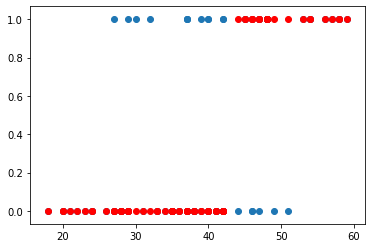

Accuracy = 0.775


In [6]:
x_train,X_test,y_train,y_test=train_test_split(df['Age'],df['Purchased'],test_size=0.20) 
m,c=logistic(x_train,y_train) 
print(m,c)
# Making predictions
#X_test = X_test.sort_values()  # Sorting values is optional only to see the line graph
X_test_norm = normalize(X_test)
y_pred = predict(X_test_norm, c, m)
y_pred = [1 if p >= 0.5 else 0 for p in y_pred]

plt.clf()
plt.scatter(X_test, y_test)
plt.scatter(X_test, y_pred, c="red")
#plt.plot(X_test, y_pred, c="red", linestyle='-', marker='o') # Only if values are sorted
plt.show()

# The accuracy
accuracy = 0
for i in range(len(y_pred)):
    if y_pred[i] == y_test.iloc[i]:
        accuracy += 1
print(f"Accuracy = {accuracy / len(y_pred)}")
                                              

C:\Users\bhanu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bhanu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


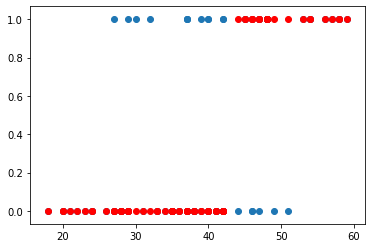

Accuracy = 0.775


In [7]:
# Making predictions using scikit learn
from sklearn.linear_model import LogisticRegression

# Create an instance and fit the model 
lr_model = LogisticRegression()
lr_model.fit(x_train.values.reshape(-1, 1), y_train.values.reshape(-1, 1))

# Making predictions
y_pred_sk = lr_model.predict(X_test.values.reshape(-1, 1))
plt.clf()
plt.scatter(X_test, y_test)
plt.scatter(X_test, y_pred_sk, c="red")
plt.show()

# Accuracy
print("Accuracy = {}".format(lr_model.score(X_test.values.reshape(-1, 1), y_test.values.reshape(-1, 1))))